Apply word2vec on a subset of the dataset of Amazon Product Reviews

In [ ]:
#installing the kaggle library
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
#Upload Your kaggle Json file
#We configure the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
##Importing  the dataset
!kaggle datasets download -d grikomsn/amazon-cell-phones-reviews

In [ ]:
#!pip install gensim


### **Reading and Exploring the dataset**





the dataset we used in our notebook is a subset of Amazon reviews from the Cell Phones category, we gonna read it using pandas.
Link to the Dataset:
https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews/download?datasetVersionNumber=2

In [ ]:
import gensim
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Cell_Phones_reviews.csv",delimiter =',')
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3.0,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1.0,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5.0,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3.0,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4.0,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


We will train a word2vec model using only the column "body" as we can also use the "title", we can delete some unecessary columns or just ignore them

In [ ]:
df.body[0]

"I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Recep

In [ ]:
df.shape

(23423, 8)

### **Simple Preprocessing**

this simple function in gensim libray can do some basic preprocessing operations like converting all the words to lower case, trimming spaces, removing punctuations and stop words for our first review as an example to show you 

In [ ]:
gensim.utils.simple_preprocess("I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Reception is not too shabby. I was using it in the elevator which is a remarkable feat considering my old phone would lose service by simply putting it in my pocket. ===> Compared to my old Samsung, this phone works quite well. The ring tones are loud enough to hear and the phone actually charges quickly and has great battery life. It doesn't heat up like a potatoe in the oven either during long phone convos. ===> Nice bright, large screen. ===> Cute ways to customize it. Scroll bar can be set to purple, pink, aqua, orange, etc. Overall: Okay phone. It serves its purpose but definitely pales in comparison to these new phones coming out from Sprint. Why get so so when you can get great?")

['had',
 'the',
 'samsung',
 'for',
 'awhile',
 'which',
 'is',
 'absolute',
 'doo',
 'doo',
 'you',
 'can',
 'read',
 'my',
 'review',
 'on',
 'it',
 'and',
 'detect',
 'my',
 'rage',
 'at',
 'the',
 'stupid',
 'thing',
 'it',
 'finally',
 'died',
 'on',
 'me',
 'so',
 'used',
 'this',
 'nokia',
 'phone',
 'bought',
 'in',
 'garage',
 'sale',
 'for',
 'wonder',
 'she',
 'sold',
 'it',
 'so',
 'cheap',
 'bad',
 'hate',
 'the',
 'menu',
 'it',
 'takes',
 'forever',
 'to',
 'get',
 'to',
 'what',
 'you',
 'want',
 'because',
 'you',
 'have',
 'to',
 'scroll',
 'endlessly',
 'usually',
 'phones',
 'have',
 'numbered',
 'categories',
 'so',
 'can',
 'simply',
 'press',
 'the',
 'and',
 'get',
 'where',
 'you',
 'want',
 'to',
 'go',
 'it',
 'pain',
 'to',
 'put',
 'it',
 'on',
 'silent',
 'or',
 'vibrate',
 'if',
 'you',
 're',
 'in',
 'class',
 'and',
 'it',
 'rings',
 'you',
 'have',
 'to',
 'turn',
 'it',
 'off',
 'immediately',
 'there',
 'no',
 'fast',
 'way',
 'to',
 'silence',
 'the

Now we gonna apply it to the entire body column

In [92]:
review_text = df.body.astype(str).apply(gensim.utils.simple_preprocess)

In [93]:
# We might have to delete stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Assuming review_text is a Pandas Series object
stopwords_set = set(stopwords.words('english'))
review_text = review_text.apply(lambda x: [word for word in x if word not in stopwords_set])
review_text = review_text.apply(lambda x: " ".join(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
review_text

0        samsung awhile absolute doo doo read review de...
1        due software issue nokia sprint phone text mes...
2        great reliable phone also purchased phone sams...
3        love phone really need one expect price bill r...
4        phone great every purpose offers except day bo...
                               ...                        
23418                                             unlocked
23419                         gift friend loved thank much
23420                         phone great like great phone
23421    mobile described good condition came generic c...
23422                                                  nan
Name: body, Length: 23423, dtype: object

In [95]:
review_text = review_text.astype(str).apply(gensim.utils.simple_preprocess)

In [96]:
review_text

0        [samsung, awhile, absolute, doo, doo, read, re...
1        [due, software, issue, nokia, sprint, phone, t...
2        [great, reliable, phone, also, purchased, phon...
3        [love, phone, really, need, one, expect, price...
4        [phone, great, every, purpose, offers, except,...
                               ...                        
23418                                           [unlocked]
23419                   [gift, friend, loved, thank, much]
23420                   [phone, great, like, great, phone]
23421    [mobile, described, good, condition, came, gen...
23422                                                [nan]
Name: body, Length: 23423, dtype: object

We created a pandas seriesn, each object in those series is a list of tokenized words 

###  **Training the model**

Now we gonna create our model, and those are the hyperparameters we will use:



*   Dimensionality of the feature vector is 100 (by default)

*   The maximum distance between analyzed words within a sentence is 10.

*   Ignores all words with the total 
frequency lower than 2 per corpus.



In [97]:
model = gensim.models.Word2Vec(window = 10, min_count = 2, workers = 4)

In [98]:
model.vector_size

100

In [99]:
#building vocabulary
model.build_vocab(review_text, progress_per=100)

In [100]:
model.corpus_count

23423

In [101]:
#training the model
model.train(review_text, total_examples= model.corpus_count, epochs =model.epochs)

(3089897, 3499570)

  Let's evaluate our model by doing some some similarities

In [102]:
model.wv.most_similar("bad")

[('terrible', 0.7594252824783325),
 ('horrible', 0.746745765209198),
 ('sucks', 0.7050692439079285),
 ('piece', 0.6953699588775635),
 ('worse', 0.6843675374984741),
 ('buzzing', 0.6816175580024719),
 ('okay', 0.6710017919540405),
 ('awful', 0.6526092290878296),
 ('flies', 0.6492034792900085),
 ('garbage', 0.6446134448051453)]

In [103]:
#We could see similarity between two words
model.wv.similarity(w1= "cheap", w2 = "inexpensive")

0.67869323

In [104]:
model.wv.similarity(w1= "good", w2 = "great")

0.8413618

In [105]:
model.wv.similarity(w1= "cheap", w2 = "inexpensive")

0.67869323

In [106]:
model.wv.similarity(w1= "great", w2 = "product")

-0.051025692

In [107]:
# we save our model to use it for visulization
model.save("/content/amazon_reviews_word2vec.model")

we could easily conduct that our Word2Vec model is an efficient predictive model for locating words that share common contexts in a training corpus

### **Visualizing Word2Vec with t-SNE**

The word embeddings made by the model can be visualised by reducing dimensionality of the words to 2 dimensions using tSNE

The visulaization can be useful to understand how Word2Vec works and how to intrepret relations between vectors captured from our text

In [108]:
# Need to import some libraries
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [81]:
# We load our model
model = Word2Vec.load("/content/amazon_reviews_word2vec.model")

I found in this blog: https://soumilshah1995.blogspot.com/2020/05/gensim-word2vec-visualization-helper.html a class that simplify the plotting for us

**The class**

In [109]:
from sklearn.decomposition import PCA
import pandas as pd
import os
import numpy as np
from gensim.models import Word2Vec

class GensimWord2vecPlotter(object):

    __slots__ = ["model", "words", "result", "_tem"]

    def __init__(self, model):
        self.model = model
        self.words = None
        self.result = None
        self._tem = self.preprocess()

    def plot_scatter_words(self, Size=80):
        SIZE = Size
        words = self.words
        result = self.result

        for i, word in enumerate(words):
            if i == SIZE:
                break
            
            plt.annotate(word,
                         xy=(result[i, 0], result[i, 1]),
                         horizontalalignment='left',verticalalignment='bottom')

        plt.scatter(result[:SIZE, 0], result[:SIZE, 1], s=(40,))
        plt.title("Word Embeddings")
        plt.grid(False, alpha=1)
        plt.legend()
        plt.show()

    def preprocess(self):
        """
        Preprocessing sets all the variables in the constructor
        :return: None
        """
        model = self.model.wv
        X = np.array([model.get_vector(word) for word in model.index_to_key])
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        words = model.index_to_key
        self.words = words
        self.result = result

    def getPandasDF(self):
        result = self.result
        words = self.words
        
        x = [result[i, 0] for i in range(len(words))]
        y = [result[i, 1] for i in range(len(words))]

        wordsdf = pd.DataFrame(data={
            "words": words,
            "x": x,
            "y": y
        })

        return wordsdf

    def plot_scatter(self):
        result = self.result
        words = self.words

        x = [result[i, 0] for i in range(len(words))]
        y = [result[i, 1] for i in range(len(words))]

        wordsdf = pd.DataFrame(data={
            "words": words,
            "x": x,
            "y": y
        })
        wordsdf.plot.scatter("x", "y", s=10, figsize=(20, 12))


In [110]:
# Create an instance of the class
vis = GensimWord2vecPlotter(model=model)

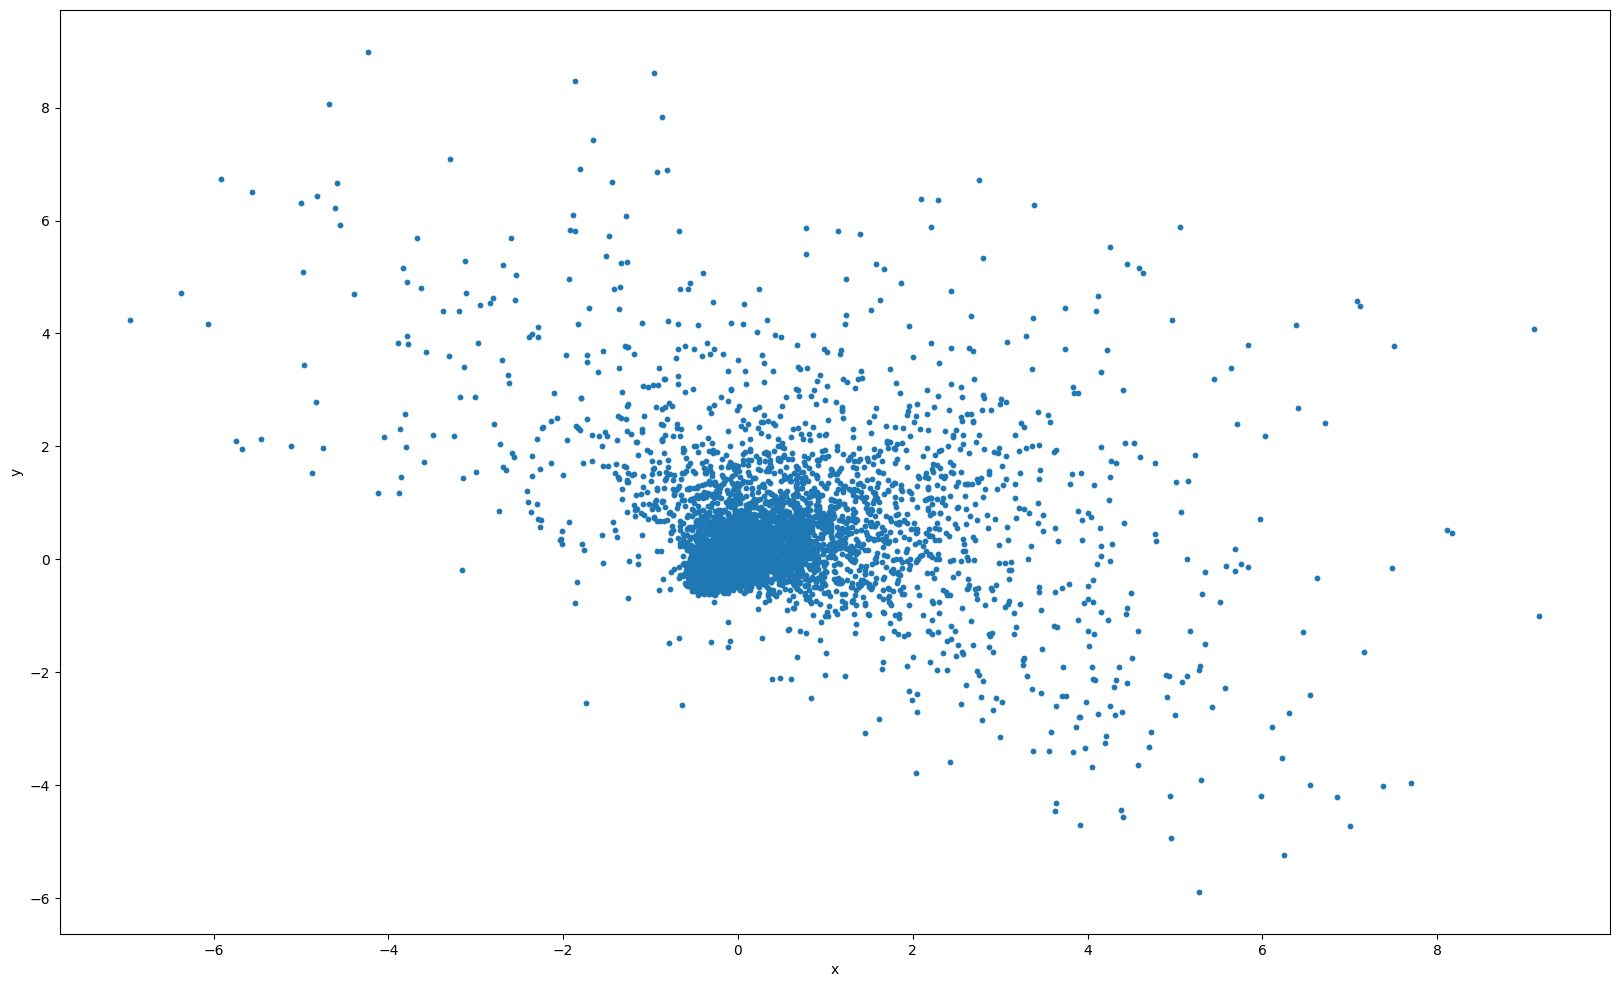

In [111]:
vis.plot_scatter()

<ipython-input-109-38e8e2c15f18>:32: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, alpha=1)


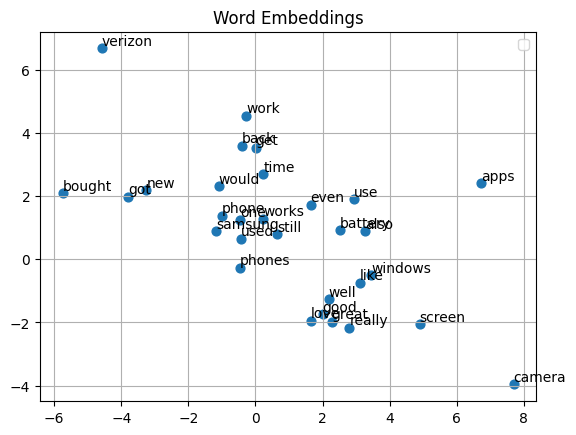

In [112]:
vis.plot_scatter_words(Size=30)

In [113]:
vis.getPandasDF().head(5)

,words,x,y
0,phone,-0.989673,1.384822
1,great,2.271687,-1.970665
2,one,-0.463404,1.254625
3,good,2.000861,-1.739961
4,screen,4.898848,-2.054448
